___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [2]:
# Check which env is jupyter running on
import sys
print(sys.executable)

/home/onofre/anaconda3/bin/python


In [1]:
# Manually add our created environment
# https://stackoverflow.com/questions/39604271/conda-environments-not-showing-up-in-jupyter-notebook (must install first ipykernel)

In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [4]:
# set start and end datetime objects
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2017,1,1)

In [5]:
start.date()

datetime.date(2013, 1, 1)

In [6]:
# Thicker symbols for banks as they appear above: BAC, C, GS, JPM, MS, WFC 

In [7]:
# Bank of America
BAC = data.DataReader("BAC", 'iex', start, end)

# CitiGroup
C = data.DataReader("C", 'iex', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'iex', start, end)

# JP Morgan
JPM = data.DataReader("JPM", 'iex', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'iex', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'iex', start, end)

In [8]:
WFC.head()

,open,high,low,close,volume
date,,,,,
2013-11-20,37.9217,38.2165,37.7049,37.8263,15790577
2013-11-21,37.9911,38.4919,37.9694,38.2253,16450016
2013-11-22,38.1559,38.4854,38.0947,38.4681,11035085
2013-11-25,38.5721,38.7802,38.5027,38.5721,12363867
2013-11-26,38.6155,38.8019,38.4074,38.4247,13429858


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [9]:
tickers = ["BAC ", "C ", "GS ", "JPM ", "MS ", "WFC "]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [10]:
# using pd.concat method
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [11]:
bank_stocks.head()

BAC                                              C            \
               open     high      low    close     volume     open     high   
date                                                                          
2013-11-20  14.3059  14.3246  14.1464  14.2027  107174852  48.5947  48.8232   
2013-11-21  14.2777  14.6342  14.2590  14.6248  142053629  48.4139  49.4705   
2013-11-22  14.7233  14.8099  14.6342  14.6717  110331145  49.4419  50.0131   
2013-11-25  14.6999  14.9907  14.6905  14.8312  153765538  49.9655  51.0982   
2013-11-26  14.8547  14.9813  14.8312  14.8969  114833655  50.5461  50.8888   

                                          ...         MS                     \
                low    close    volume    ...        open     high      low   
date                                      ...                                 
2013-11-20  48.1854  48.3282  18351229    ...     27.8079  28.0268  27.5615   
2013-11-21  48.3377  49.2420  22868922    ...     27.8261  28.3097  27.7623   
2013-11-22  49.3467  49.8893  26055018    ...     28.2093  28.6016  28.0725   
2013-11-25  49.9559  50.7270  32610039    ...     28.6290  29.0122  28.5925   
2013-11-26  50.4129  50.4605  17667414    ...     28.7750  28.9848  28.6381   

                                  WFC                                        
              close    volume     open     high      low    close    volume  
date                                                                         
2013-11-20  27.6163  11530062  37.9217  38.2165  37.7049  37.8263  15790577  
2013-11-21  28.1819  10494871  37.9911  38.4919  37.9694  38.2253  16450016  
2013-11-22  28.5925  10566472  38.1559  38.4854  38.0947  38.4681  11035085  
2013-11-25  28.7750  13063078  38.5721  38.7802  38.5027  38.5721  12363867  
2013-11-26  28.6381   9196029  38.6155  38.8019  38.4074  38.4247  13429858  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [12]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [13]:
bank_stocks.head()

Bank Ticker     BAC                                              C            \
Stock Info      open     high      low    close     volume     open     high   
date                                                                           
2013-11-20   14.3059  14.3246  14.1464  14.2027  107174852  48.5947  48.8232   
2013-11-21   14.2777  14.6342  14.2590  14.6248  142053629  48.4139  49.4705   
2013-11-22   14.7233  14.8099  14.6342  14.6717  110331145  49.4419  50.0131   
2013-11-25   14.6999  14.9907  14.6905  14.8312  153765538  49.9655  51.0982   
2013-11-26   14.8547  14.9813  14.8312  14.8969  114833655  50.5461  50.8888   

Bank Ticker                                ...         MS                     \
Stock Info       low    close    volume    ...        open     high      low   
date                                       ...                                 
2013-11-20   48.1854  48.3282  18351229    ...     27.8079  28.0268  27.5615   
2013-11-21   48.3377  49.2420  22868922    ...     27.8261  28.3097  27.7623   
2013-11-22   49.3467  49.8893  26055018    ...     28.2093  28.6016  28.0725   
2013-11-25   49.9559  50.7270  32610039    ...     28.6290  29.0122  28.5925   
2013-11-26   50.4129  50.4605  17667414    ...     28.7750  28.9848  28.6381   

Bank Ticker                        WFC                                        
Stock Info     close    volume     open     high      low    close    volume  
date                                                                          
2013-11-20   27.6163  11530062  37.9217  38.2165  37.7049  37.8263  15790577  
2013-11-21   28.1819  10494871  37.9911  38.4919  37.9694  38.2253  16450016  
2013-11-22   28.5925  10566472  38.1559  38.4854  38.0947  38.4681  11035085  
2013-11-25   28.7750  13063078  38.5721  38.7802  38.5027  38.5721  12363867  
2013-11-26   28.6381   9196029  38.6155  38.8019  38.4074  38.4247  13429858  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [14]:
# Note: my values will probably differ because my time period goes from 2013 to 2017 (iex source)
# pandas .xs Returns a cross-section (row(s) or column(s)) from the Series/DataFrame.
bank_stocks.xs(key='close', axis=1, level='Stock Info').max()
#df.xs('one', level=1)

Bank Ticker
BAC      22.5133
C        58.9093
GS      237.7628
JPM      83.2783
MS       41.9656
WFC      54.1289
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [15]:
returns = pd.DataFrame()

In [16]:
bank_stocks.head()

Bank Ticker     BAC                                              C            \
Stock Info      open     high      low    close     volume     open     high   
date                                                                           
2013-11-20   14.3059  14.3246  14.1464  14.2027  107174852  48.5947  48.8232   
2013-11-21   14.2777  14.6342  14.2590  14.6248  142053629  48.4139  49.4705   
2013-11-22   14.7233  14.8099  14.6342  14.6717  110331145  49.4419  50.0131   
2013-11-25   14.6999  14.9907  14.6905  14.8312  153765538  49.9655  51.0982   
2013-11-26   14.8547  14.9813  14.8312  14.8969  114833655  50.5461  50.8888   

Bank Ticker                                ...         MS                     \
Stock Info       low    close    volume    ...        open     high      low   
date                                       ...                                 
2013-11-20   48.1854  48.3282  18351229    ...     27.8079  28.0268  27.5615   
2013-11-21   48.3377  49.2420  22868922    ...     27.8261  28.3097  27.7623   
2013-11-22   49.3467  49.8893  26055018    ...     28.2093  28.6016  28.0725   
2013-11-25   49.9559  50.7270  32610039    ...     28.6290  29.0122  28.5925   
2013-11-26   50.4129  50.4605  17667414    ...     28.7750  28.9848  28.6381   

Bank Ticker                        WFC                                        
Stock Info     close    volume     open     high      low    close    volume  
date                                                                          
2013-11-20   27.6163  11530062  37.9217  38.2165  37.7049  37.8263  15790577  
2013-11-21   28.1819  10494871  37.9911  38.4919  37.9694  38.2253  16450016  
2013-11-22   28.5925  10566472  38.1559  38.4854  38.0947  38.4681  11035085  
2013-11-25   28.7750  13063078  38.5721  38.7802  38.5027  38.5721  12363867  
2013-11-26   28.6381   9196029  38.6155  38.8019  38.4074  38.4247  13429858  

[5 rows x 30 columns]

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [17]:
tickers

['BAC ', 'C ', 'GS ', 'JPM ', 'MS ', 'WFC ']

In [18]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
date,,,,,,
2013-11-20,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-21,0.029720,0.018908,0.012545,0.019963,0.020481,0.010548
2013-11-22,0.003207,0.013145,0.006165,0.004195,0.014570,0.006352
2013-11-25,0.010871,0.016791,0.008209,0.003306,0.006383,0.002704
2013-11-26,0.004430,-0.005254,-0.008496,-0.008326,-0.004758,-0.003821


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

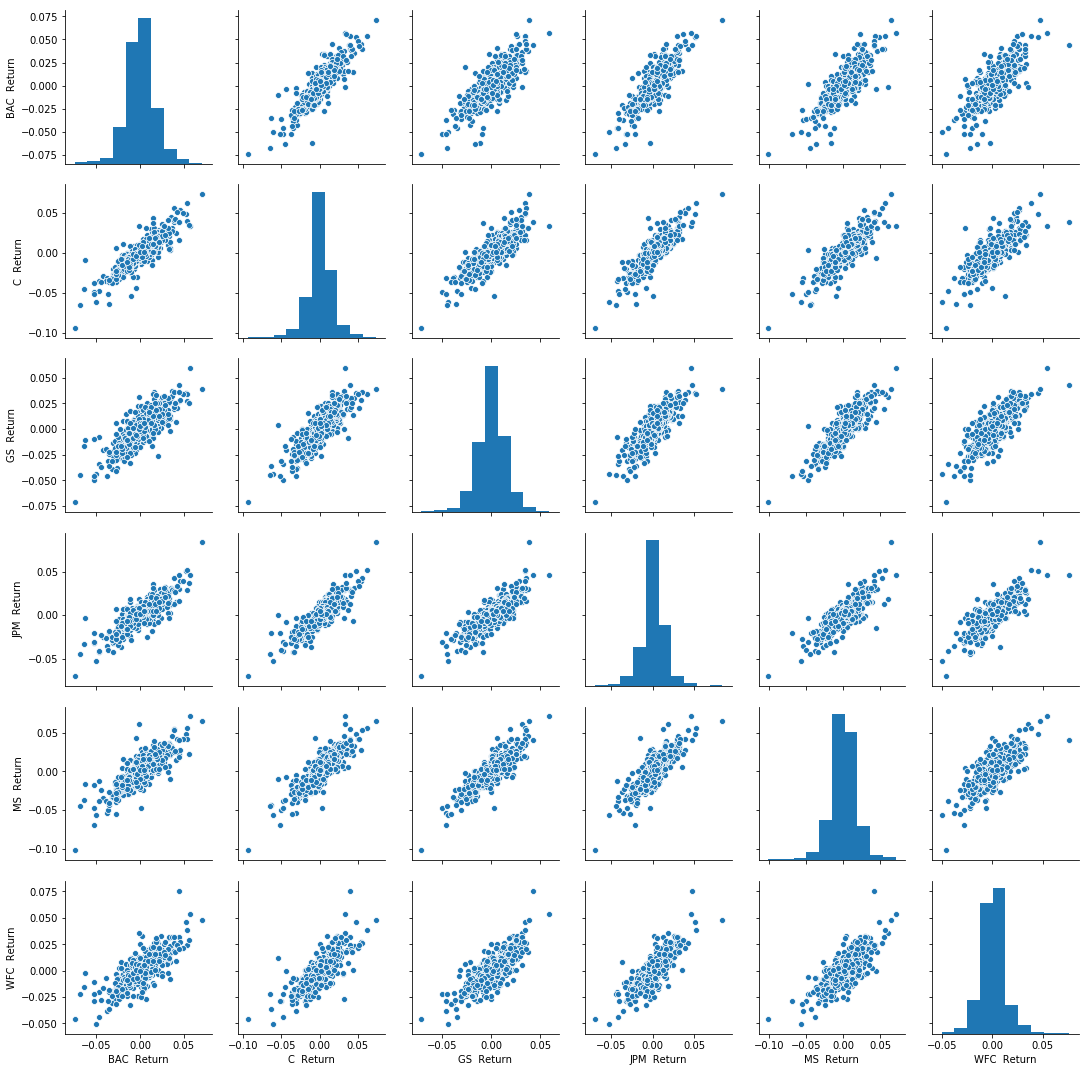

In [20]:
import seaborn as sns
sns.pairplot(data=returns[1:]) # first row are NaN elements 

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [21]:
returns.idxmin()

BAC  Return    2016-06-24
C  Return      2016-06-24
GS  Return     2016-06-24
JPM  Return    2016-06-24
MS  Return     2016-06-24
WFC  Return    2015-08-24
dtype: object

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [22]:
returns.idxmax()

BAC  Return    2016-02-12
C  Return      2016-02-12
GS  Return     2016-11-09
JPM  Return    2016-02-12
MS  Return     2016-11-09
WFC  Return    2016-11-10
dtype: object

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [23]:
# std over the entire time period
returns.std() # Higher std translates to riskier (for this time span, they are all about the same)

BAC  Return    0.016735
C  Return      0.016142
GS  Return     0.014072
JPM  Return    0.013579
MS  Return     0.016959
WFC  Return    0.012332
dtype: float64

In [24]:
# std for 2015
returns.loc['2015-01-01':'2015-12-31'].std() #higher ones are Bank of America and Morgan Stanley

BAC  Return    0.016174
C  Return      0.015288
GS  Return     0.014043
JPM  Return    0.014006
MS  Return     0.016287
WFC  Return    0.012552
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/home/onofre/anaconda3/envs/UABC_ML_Workshop/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/onofre/anaconda3/envs/UABC_ML_Workshop/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


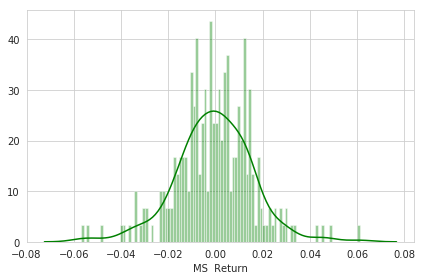

In [25]:
sns.set_style("whitegrid")
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS  Return'], bins=100, color='green')
plt.tight_layout()

In [26]:
#returns.ix['2015-01-01':'2015-12-31']['MS  Return'].head()

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/home/onofre/anaconda3/envs/UABC_ML_Workshop/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/home/onofre/anaconda3/envs/UABC_ML_Workshop/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/onofre/anaconda3/envs/UABC_ML_Workshop/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/onofre/anaconda3/envs/UABC_ML_Workshop/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])]

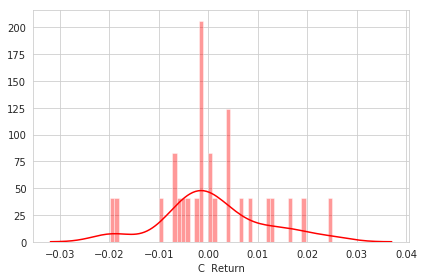

In [27]:
# using the 2013 data
sns.set_style("whitegrid")
sns.distplot(returns.ix['2013-09-24':'2013-12-31']['C  Return'], bins=50, color='red')
plt.tight_layout()

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

ModuleNotFoundError: No module named 'cufflinks'

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [ ]:
bank_stocks.head()

In [ ]:
# using pandas line plot
for tick in tickers:
    bank_stocks[tick]['close'].plot(figsize=(12,6), label=tick)
plt.legend()

In [ ]:
# using pandas xs
bank_stocks.xs(key='close', axis=1, level='Stock Info').plot()

# missing here the line of code that moves the legend to the outer plot

In [ ]:
# Using live plots with plotly (just have to add iplot)
bank_stocks.xs(key='close', axis=1, level='Stock Info').iplot() #this one sets legend and dates by itself!

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [ ]:
BAC['close'].head() #they are separate dataframes!

In [ ]:
# two plots: rolling average and BAC close price
#bank_stocks[bank_stocks['BAC '].xs(key='close', axis=1, level='Stock Info').iplot()
#bank_stocks['BAC ']['close'].plot(figsize=(12,6), label='BACK CLOSE', color='green')

plt.figure(figsize=(12,6))
BAC['close'].ix['2013-09-24':'2013-12-31'].plot(figsize=(12,6), color='green', label='BAC CLOSE')
BAC['close'].ix['2013-09-24':'2013-12-31'].rolling(window=30).mean().plot(label='30 day average') #syntax for moving average
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

In [ ]:
# create first appropriate matrix
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(), annot=True, cmap='viridis')

** Optional: Use seaborn's clustermap to cluster the correlations together:**

In [ ]:
sns.clustermap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(), annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [ ]:
BAC.head()

In [ ]:
BAC[['open','high','low','close']].ix['2015-01-01':'2016-01-01'].iplot(kind='candle')
#BAC[['Open', 'High', 'Low', 'Close']].ix['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [ ]:
MS['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [ ]:
BAC['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll', title='Bollinger Band Plot')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.